## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX", drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD", drop_first=True)
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

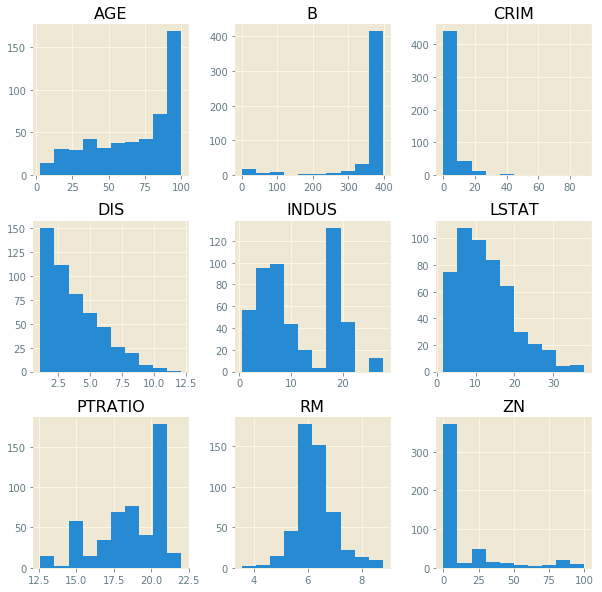

In [173]:
# Your code here
boston_continuous = boston_features.iloc[:,0:10]
boston_continuous = boston_continuous.drop(labels='CHAS', axis=1)
# boston_continuous.head()
boston_categorical = boston_features.iloc[:,11:17]
chas = pd.DataFrame(data=boston_features['CHAS'])
# boston_categorical = boston_categorical.merge(chas, how='outer', left_index=True, right_index=True)
# boston_categorical.head()
boston_continuous.hist(figsize=(10,10));

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

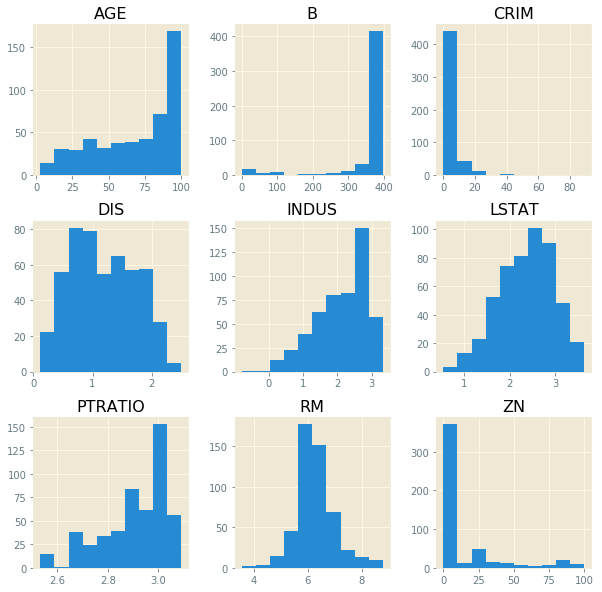

In [174]:
# Your code here
import numpy as np
non_normal = ['DIS', 'INDUS', 'LSTAT', 'PTRATIO']
for feat in non_normal:
    boston_continuous[feat] = boston_continuous[feat].map(lambda x: np.log(x))
boston_continuous.hist(figsize=(10,10));

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [175]:
# Your code here
#  rewrite data in this variable to be ==0 or !=0, and turn it into a categorical data piece
for n, i in enumerate(boston_features['ZN']):
    if i != 0:
        boston_features.loc[n, 'ZN'] = 1 # lot is more than 25,000 ft
#         if lost is less than 25,000 ft 'ZN' is equal to 0
zn_categories = boston_features['ZN'].astype('category')
zn_categories.cat.codes
zn_dummies = pd.get_dummies(zn_categories, prefix='LOT25000', drop_first=True)
boston_features = boston_features.drop(['ZN'], axis=1)
boston_continuous = boston_continuous.drop(['ZN'], axis=1)
boston_features = pd.concat([boston_features, zn_dummies], axis=1)
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]",LOT25000_1.0
0,0.00632,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0,1
1,0.02731,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0,0
2,0.02729,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0,0
3,0.03237,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0,0
4,0.06905,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0,0


## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [176]:
# Your code here
# min max scaling on age
min_age = min(boston_features['AGE'])
# min_age
max_age = max(boston_features['AGE'])
# max_age
transform = []
for m, j in enumerate(boston_features['AGE']):
    transform.append((m - min_age) / (max_age - min_age))
age_min_max = pd.DataFrame(transform)
boston_features = boston_features.drop(['AGE'], axis=1)
boston_continuous = boston_continuous.drop(['AGE'], axis=1)
boston_continuous = pd.concat([boston_continuous, age_min_max], axis=1)
new_columns = ['CRIM', 'INDUS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'age_min_max']
boston_continuous.columns = new_columns
boston_continuous.head()

# standardization on b 
mean_b = boston_features['B'].mean()
# mean_b
std_b = boston_features['B'].std()
# std_b
b_transform = []
for o, k in enumerate(boston_features['B']):
    b_transform.append((o - mean_b)/(std_b))
b_standardize = pd.DataFrame(b_transform)
# b_standardize
boston_features = boston_features.drop(['B'], axis = 1)
boston_continuous = boston_continuous.drop(['B'], axis = 1)
boston_continuous = pd.concat([boston_continuous, b_standardize], axis=1)
new_columns = ['CRIM', 'INDUS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'age_min_max', 'b_std']
boston_continuous.columns = new_columns
boston_continuous.head()

# mean normalization on crim
mean_crim = boston_features['CRIM'].mean()
# mean_crim
max_crim = max(boston_features['CRIM'])
# max_crim
min_crim = min(boston_features['CRIM'])
# min_crim
crim_transform = []
for p, l in enumerate(boston_features['CRIM']):
    crim_transform.append((p - mean_crim) / (max_crim - min_crim))
crim_mean_std = pd.DataFrame(crim_transform)
# crim_mean_std
boston_features = boston_features.drop(['CRIM'], axis=1)
boston_continuous = boston_continuous.drop(['CRIM'], axis=1)
boston_continuous = pd.concat([boston_continuous, crim_mean_std], axis=1)
new_columns = ['INDUS', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'age_min_max', 'b_std', 'crim_mean_std']
boston_continuous.columns = new_columns
boston_continuous.head()


,INDUS,RM,DIS,PTRATIO,LSTAT,age_min_max,b_std,crim_mean_std
0,0.837248,6.575,1.408545,2.727853,1.605430,-0.029866,-3.906836,-0.040615
1,1.955860,6.421,1.602836,2.879198,2.212660,-0.019567,-3.895882,-0.029375
2,1.955860,7.185,1.602836,2.879198,1.393766,-0.009269,-3.884929,-0.018136
3,0.779325,6.998,1.802073,2.928524,1.078410,0.001030,-3.873975,-0.006896
4,0.779325,7.147,1.802073,2.928524,1.673351,0.011329,-3.863022,0.004344


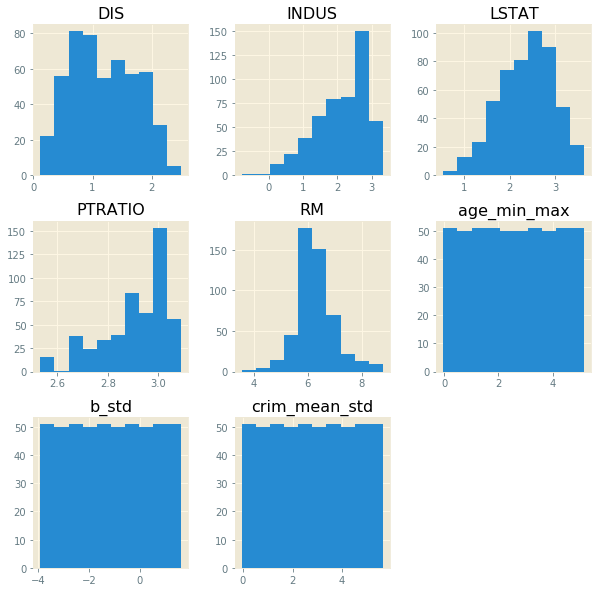

In [177]:
boston_continuous.hist(figsize=(10,10));

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.